In [1]:
from pyforest import *
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [3]:
df=pd.read_csv("winequality-red.csv")
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


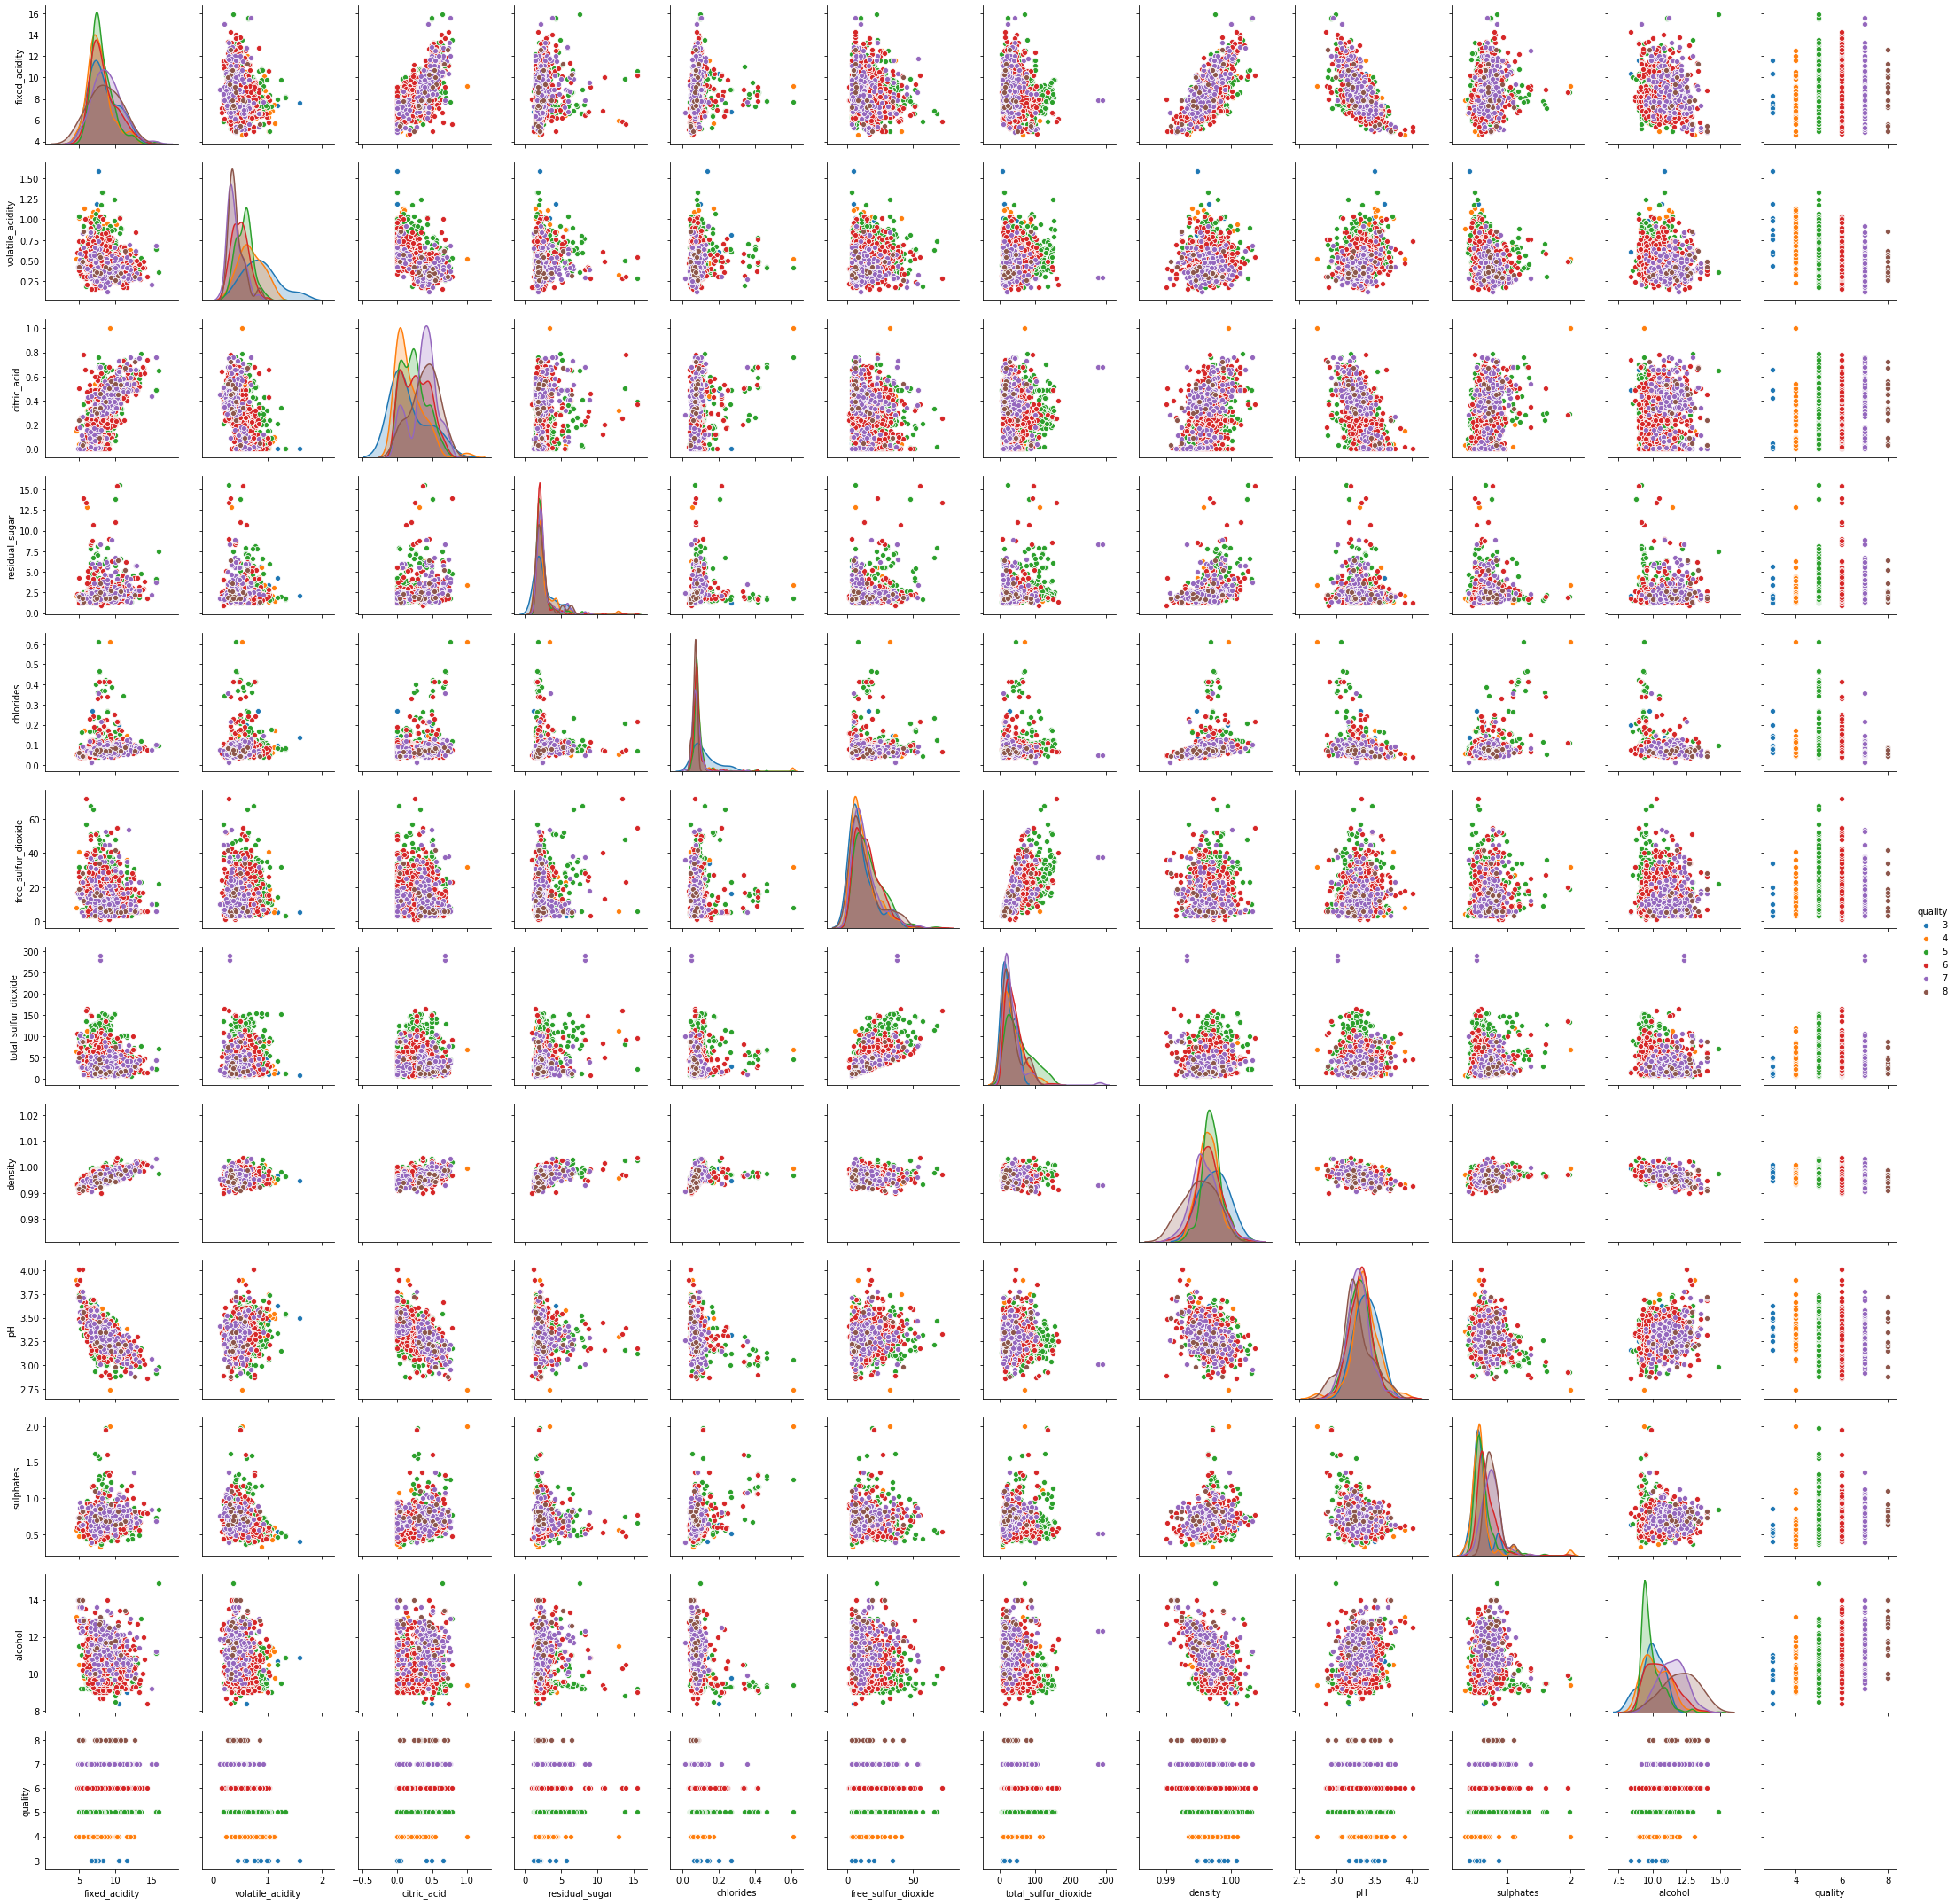

In [9]:
sns.pairplot(df,diag_kind="kde",hue="quality")

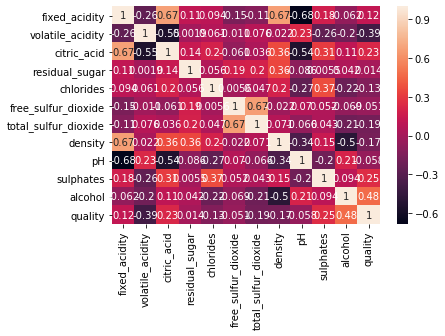

In [10]:
sns.heatmap(df.corr(),annot=True)

In [4]:
y=df["quality"]

In [6]:
df1=df.drop("quality",axis=1)
df1.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4      9.4

In [11]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [95]:
x=pd.DataFrame(df[["fixed_acidity","volatile_acidity"]])
x.head()

fixed_acidity  volatile_acidity
0            7.4              0.70
1            7.8              0.88
2            7.8              0.76
3           11.2              0.28
4            7.4              0.70

In [61]:
y1=pd.DataFrame(y)
y1["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [97]:
def full_cluster(size):
    from sklearn.cluster import KMeans
    cluster_range = range( 1, 10)
    cluster_errors = []
    cluster_sil_scores = []
    for num_clusters in cluster_range:
      clusters = KMeans( num_clusters, n_init = 8)
      clusters.fit(x)
      labels = clusters.labels_                     # capture the cluster lables
      centroids = clusters.cluster_centers_         # capture the centroids
      cluster_errors.append( clusters.inertia_ )    # capture the intertia
    # combine the cluster_range and cluster_errors into a dataframe by combining them
    clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
    # print(clusters_df[0:15])

    plt.figure(figsize=(12,6))# Elbow plot
    plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

    kmeans = KMeans(n_clusters=size)# Number of clusters
    kmeans = kmeans.fit(x)# Fitting the input data
    labels = kmeans.predict(x) # Getting the cluster labels
    centroids = kmeans.cluster_centers_# Centroid values
    print("Centroid values")
    print("sklearn")
    print(centroids)

    prediction= kmeans.predict(x)
    x["group"] = prediction
    x.head()

    for i in cluster_range:
        points = np.array(x.loc[x['group'] == i])
    #     print(points)

    sns.pairplot(x,diag_kind="kde",hue="group")

Centroid values
sklearn
[[9.73535912e+00 4.77113260e-01 1.00000000e+00]
 [6.62098765e+00 5.70411523e-01 3.00000000e+00]
 [1.22065217e+01 4.23297101e-01 2.00000000e+00]
 [7.95530179e+00 5.47528548e-01 9.32587341e-15]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


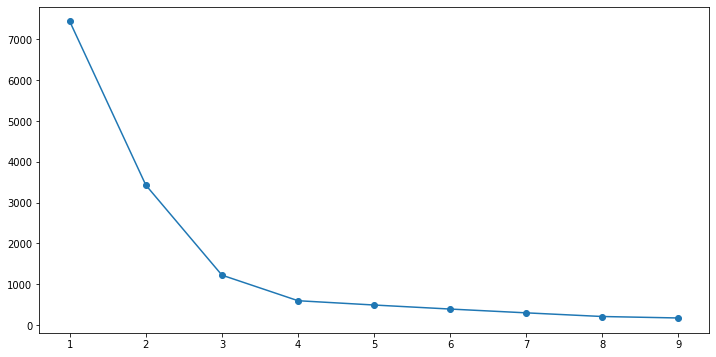

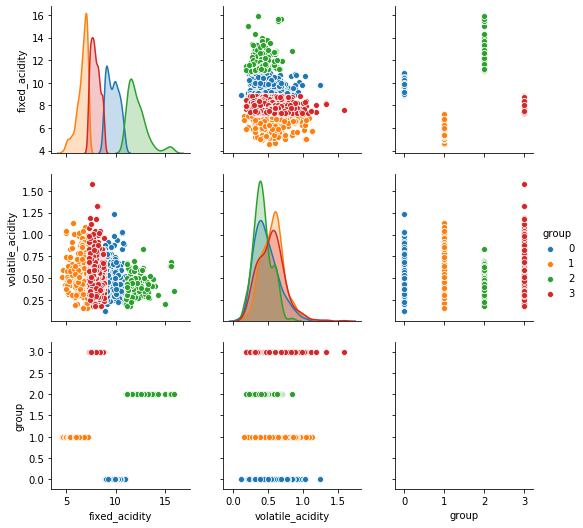

In [98]:
full_cluster(4)

In [63]:
###############################Cirtic acidity and fixed acidity############################################################

In [69]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [99]:
x=pd.DataFrame(df[["citric_acid","fixed_acidity"]])
x.head()

citric_acid  fixed_acidity
0         0.00            7.4
1         0.00            7.8
2         0.04            7.8
3         0.56           11.2
4         0.00            7.4

Centroid values
sklearn
[[ 0.56       12.20652174]
 [ 0.13869811  6.67735849]
 [ 0.24739895  8.0059754 ]
 [ 0.39151934  9.73535912]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


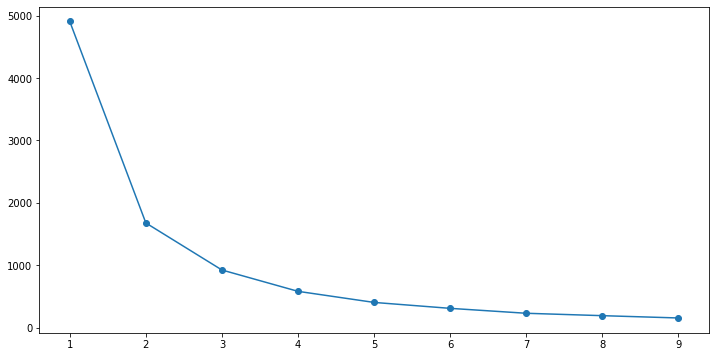

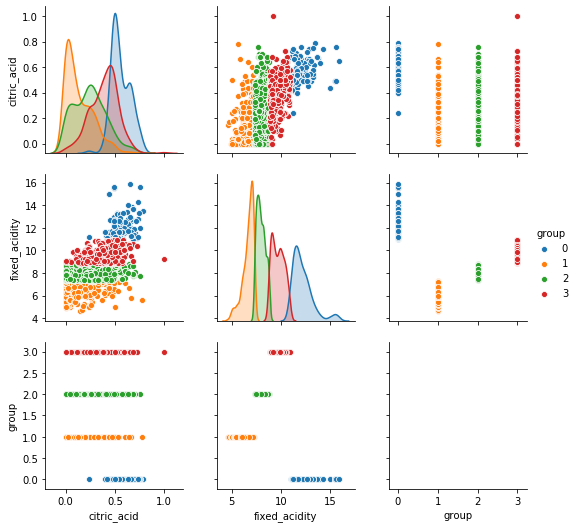

In [100]:
full_cluster(4)

In [72]:
#################################### residual suger and sulphades #########################################################

In [101]:
x=pd.DataFrame(df[['residual_sugar','sulphates']])
x.head()

residual_sugar  sulphates
0             1.9       0.56
1             2.6       0.68
2             2.3       0.65
3             1.9       0.58
4             1.9       0.56

Centroid values
sklearn
[[ 2.07180685  0.65602804]
 [13.34545455  0.65272727]
 [ 6.38986486  0.66783784]
 [ 3.39        0.66713043]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


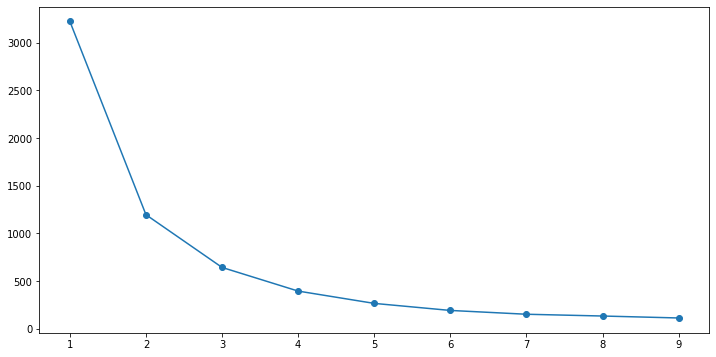

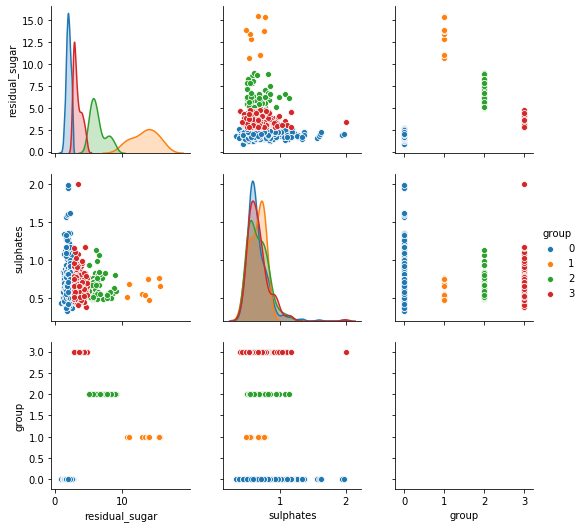

In [102]:
full_cluster(4)

In [75]:
#################################### free.sulfur.dioxide and total.sulfur.dioxide #########################################

In [103]:
x=pd.DataFrame(df[['free_sulfur_dioxide', 'total_sulfur_dioxide']])
x.head()

free_sulfur_dioxide  total_sulfur_dioxide
0                 11.0                  34.0
1                 25.0                  67.0
2                 15.0                  54.0
3                 17.0                  60.0
4                 11.0                  34.0

Centroid values
sklearn
[[ 24.73207547  82.61886792]
 [ 19.03972868  47.1996124 ]
 [ 29.71359223 129.86407767]
 [  8.31468531  20.52727273]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


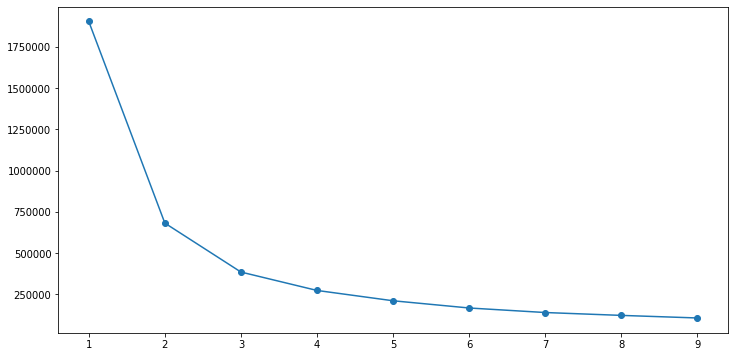

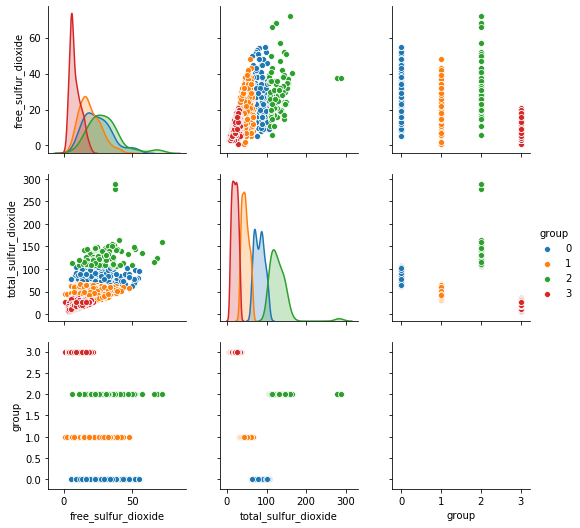

In [104]:
full_cluster(4)

In [79]:
#################################### fixed acidity, citric acidity and volatile acidity ##################################

In [105]:
x=pd.DataFrame(df[['fixed_acidity', 'volatile_acidity', 'citric_acid']])
x.head()

fixed_acidity  volatile_acidity  citric_acid
0            7.4              0.70         0.00
1            7.8              0.88         0.00
2            7.8              0.76         0.04
3           11.2              0.28         0.56
4            7.4              0.70         0.00

Centroid values
sklearn
[[ 6.73275261  0.56968641  0.14216028]
 [ 9.9003268   0.47035948  0.40362745]
 [ 8.14640411  0.54006849  0.26136986]
 [12.23333333  0.42707407  0.55955556]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


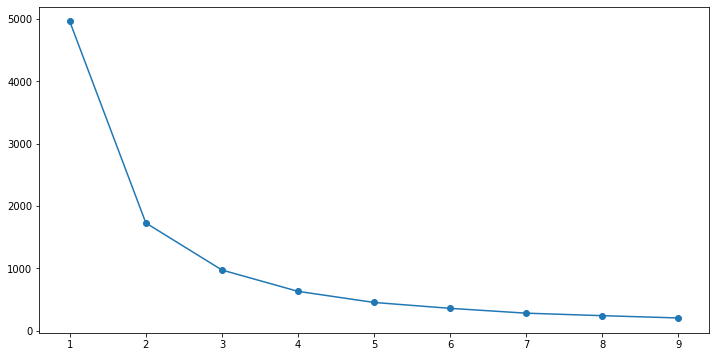

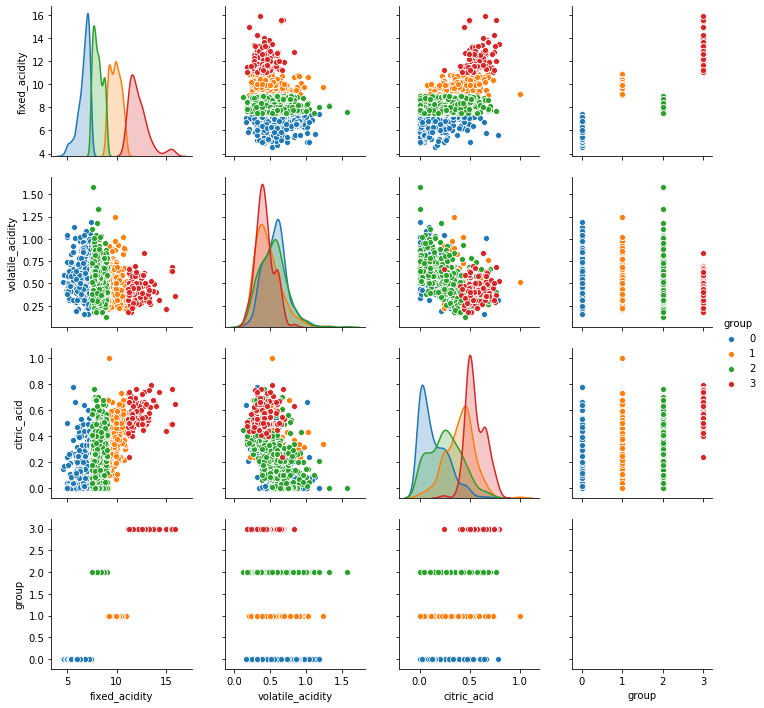

In [106]:
full_cluster(4)

In [82]:
################################################ density and pH #########################################################

In [107]:
x=pd.DataFrame(df[['density', 'pH']])
x.head()

density    pH
0   0.9978  3.51
1   0.9968  3.20
2   0.9970  3.26
3   0.9980  3.16
4   0.9978  3.51

Centroid values
sklearn
[[0.99628574 3.38953935]
 [0.99697194 3.25624782]
 [0.99776755 3.09370748]
 [0.99585066 3.56938389]]


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


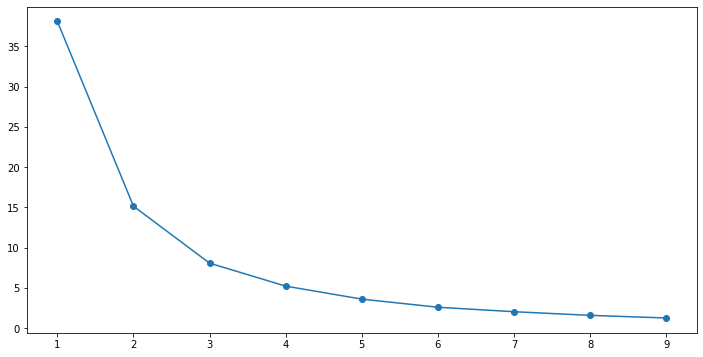

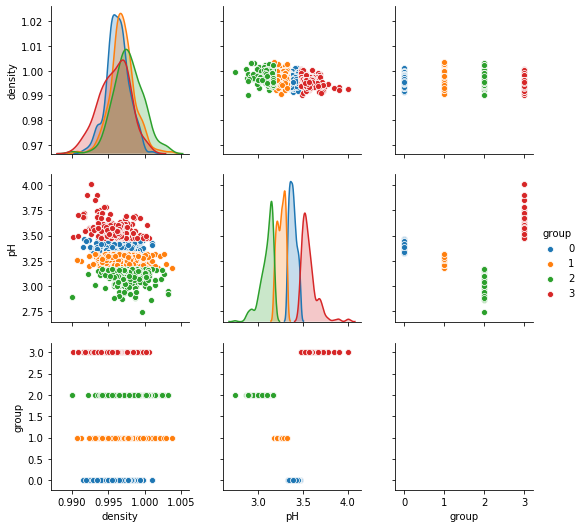

In [108]:
full_cluster(4)

In [109]:
#################################################### DecisionTree ##################################################

In [110]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

In [183]:
dtree = DecisionTreeClassifier(max_depth=2, random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [184]:
dtree.score(X_test, y_test)

0.54375

In [115]:
############################################# PCA #########################################################################

In [134]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [116]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [131]:
df1.shape

(1599, 11)

In [128]:
# sc = StandardScaler()
# X_std =  sc.fit_transform(df1)
#################### OR ###############
X_centered = (df1 - df1.mean(axis=0))/np.std(df1)

pca = PCA(n_components=df1.shape[1])
pca.fit(X_centered)

PCA(copy=True, iterated_power='auto', n_components=11, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [130]:
X_pca = pca.transform(X_centered)
X_pca.shape

(1599, 11)

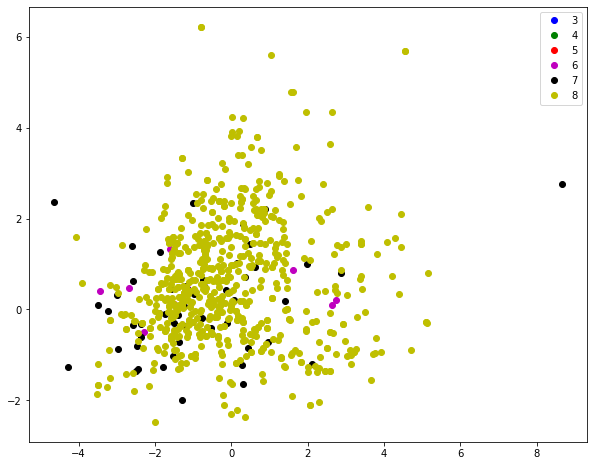

In [154]:
fig = plt.figure(1, figsize=(10, 8))

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label=3)
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label=4)
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label=5)
plt.plot(X_pca[y == 3, 0], X_pca[y == 3, 1], 'mo', label=6)
plt.plot(X_pca[y == 4, 0], X_pca[y == 4, 1], 'ko', label=7)
plt.plot(X_pca[y == 5, 0], X_pca[y == 5, 1], 'yo', label=8)
plt.legend(loc=0)

plt.show()

In [155]:
pca.components_ 

array([[ 0.48931422, -0.23858436,  0.46363166,  0.14610715,  0.21224658,
        -0.03615752,  0.02357485,  0.39535301, -0.43851962,  0.24292133,
        -0.11323207],
       [-0.11050274,  0.27493048, -0.15179136,  0.27208024,  0.14805156,
         0.51356681,  0.56948696,  0.23357549,  0.00671079, -0.03755392,
        -0.38618096],
       [-0.12330157, -0.44996253,  0.23824707,  0.10128338, -0.09261383,
         0.42879287,  0.3224145 , -0.33887135,  0.05769735,  0.27978615,
         0.47167322],
       [-0.22961737,  0.07895978, -0.07941826, -0.37279256,  0.66619476,
        -0.04353782, -0.03457712, -0.17449976, -0.00378775,  0.55087236,
        -0.12218109],
       [-0.08261366,  0.21873452, -0.05857268,  0.73214429,  0.2465009 ,
        -0.15915198, -0.22246456,  0.15707671,  0.26752977,  0.22596222,
         0.35068141],
       [ 0.10147858,  0.41144893,  0.06959338,  0.04915555,  0.30433857,
        -0.01400021,  0.13630755, -0.3911523 , -0.52211645, -0.38126343,
         0.361

In [156]:
pca.explained_variance_

array([3.10107182, 1.92711489, 1.55151379, 1.21399175, 0.95989238,
       0.66002104, 0.58415655, 0.42322138, 0.34485779, 0.18144664,
       0.05959558])

In [157]:
pca.explained_variance_ratio_# % of variance

array([0.28173931, 0.1750827 , 0.1409585 , 0.11029387, 0.08720837,
       0.05996439, 0.05307193, 0.03845061, 0.0313311 , 0.01648483,
       0.00541439])

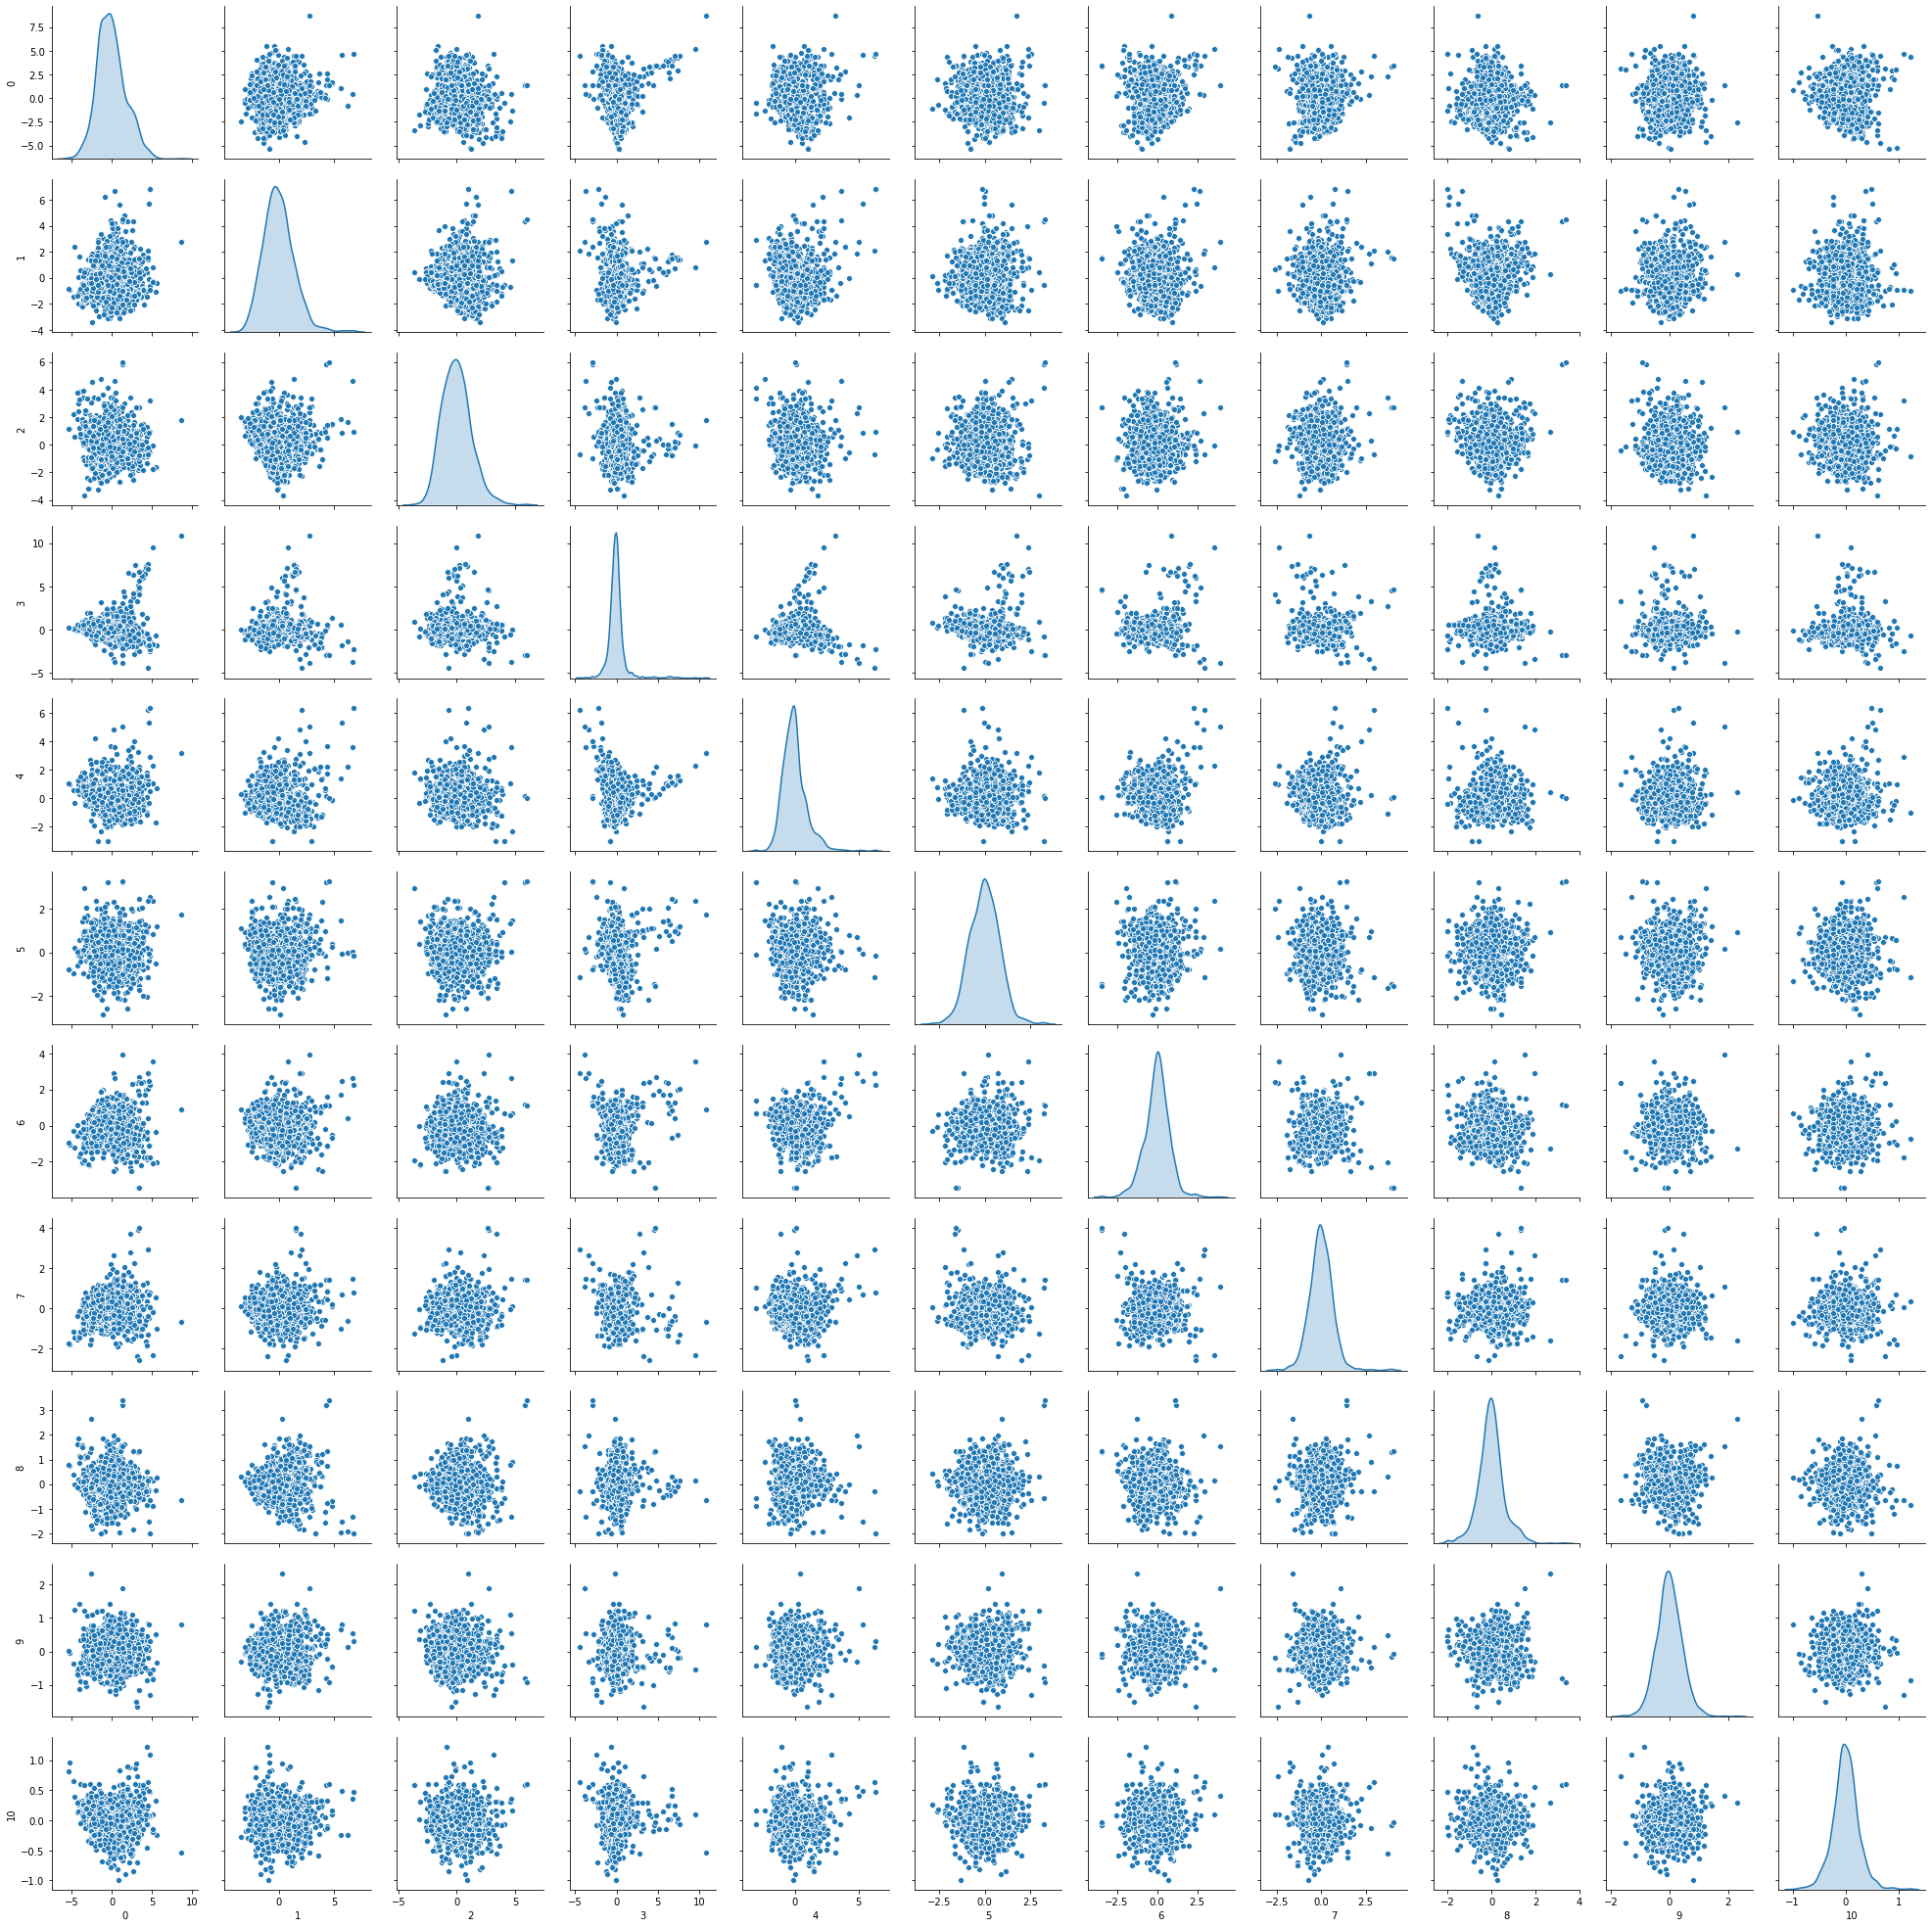

In [158]:
sns.pairplot(pd.DataFrame(X_pca),diag_kind='kde')

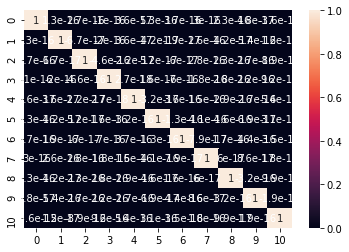

In [159]:
sns.heatmap(pd.DataFrame(X_pca).corr(),annot=True)

In [178]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(pca.transform(X_train), y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [179]:
model.score(pca.transform(X_test), y_test)

0.54375

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(pca.transform(X_train), y_train)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [181]:
rf.score(pca.transform(X_test), y_test)

0.6104166666666667

In [194]:
#prune the decision tree
from sklearn.model_selection import GridSearchCV
params={"criterion":["gini","entropy"],"max_depth":[2,3,4,5],
        "max_features":["auto","sqrt","log2"],"splitter":["best","random"]}#ISLR by springer Series
grid=GridSearchCV(estimator=dtree,param_grid=params,cv=5)
#cv=Cross Validation
grid.fit(x,y)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='entropy', max_depth=2,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                       

In [205]:
grid.best_params_#find best parameter

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [211]:
dtree_best=DecisionTreeClassifier(criterion= 'entropy',
 max_depth=4,
 max_features='auto',
 splitter='best')

In [212]:
dtree_best.fit(pca.transform(X_train), y_train)
dtree_best.score(pca.transform(X_test), y_test)

0.5

In [219]:
######################################################## KNN ##################################################

In [220]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)

In [226]:
knn_pred=knn.fit(X_train,y_train).predict(X_test)
rf.score(pca.transform(X_test), y_test)

0.6104166666666667